<a href="https://colab.research.google.com/github/GuilhermeRuy97/codewars/blob/main/PostgreSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ranking 7

## 11/03/2022 [2] SQL Basics: Maths with String Manipulations

Given a demographics table in the following format:

**demographics table schema** <br>
id <br>
name <br>
birthday <br>
race <br>

return a single column named calculation where the value is the bit length of name, added to the number of characters in race.

```sql
# solução

SELECT
  bit_length(d.name) + char_length(d.race) as calculation
  from demographics d
```

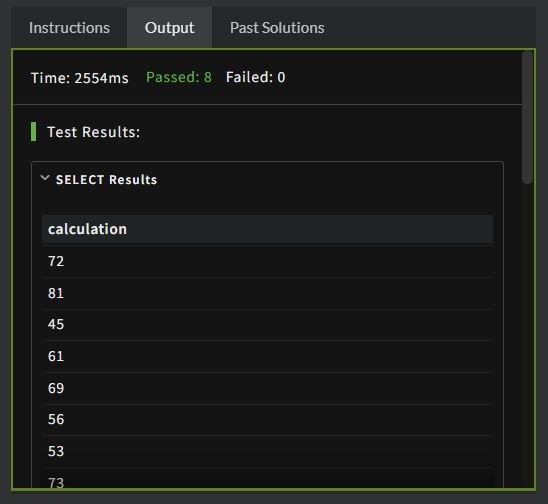

## 11/03/2022 [3] SQL with Pokemon: Damage Multipliers

You have arrived at the Celadon Gym to battle Erika for the Rainbow Badge.

She will be using Grass-type Pokemon. Any fire pokemon you have will be strong against grass, but your water types will be weakened. The multipliers table within your Pokedex will take care of that.

Using the following tables, return the pokemon_name, modifiedStrength and element of the Pokemon whose strength, after taking these changes into account, is greater than or equal to 40, ordered from strongest to weakest.

**pokemon schema**

id <br>
pokemon_name <br>
element_id <br>
str <br><br>

**multipliers schema**

id<br>
element<br>
multiplier<br>

```sql
SELECT
  p.pokemon_name as pokemon_name,
  p.str * m.multiplier as modifiedStrength,
  m.element as element
  from pokemon p
    full outer join multipliers m on p.element_id = m.id
  where p.str * m.multiplier >= 40 --  where modifiedStrength >= 40
  order by modifiedStrength DESC;
```

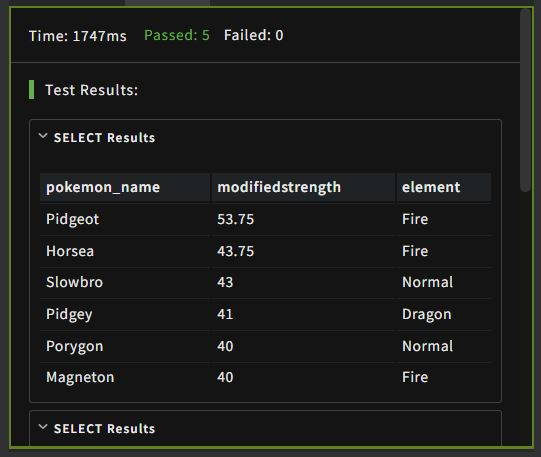

## 11/03/2022 [4] SQL Basics - Trimming the Field

You have access to a table of monsters as follows:
<br><br>
**monsters schema**

id <br>
name <br>
legs <br>
arms <br>
characteristics <br><br>
The monsters in the provided table have too many characteristics, they really only need one each. Your job is to trim the characteristics down so that each monster only has one. If there is only one already, provide that. If there are multiple, provide only the first one (don't leave any commas in there).
<br><br>
You must return a table with the format as follows:
<br><br>
**output schema**

id <br>
name <br>
characteristic <br>
Order by id <br>

```sql
SELECT
  id,
  name,
  split_part(characteristics, ',', 1) as characteristic
  from monsters
  order by id
```

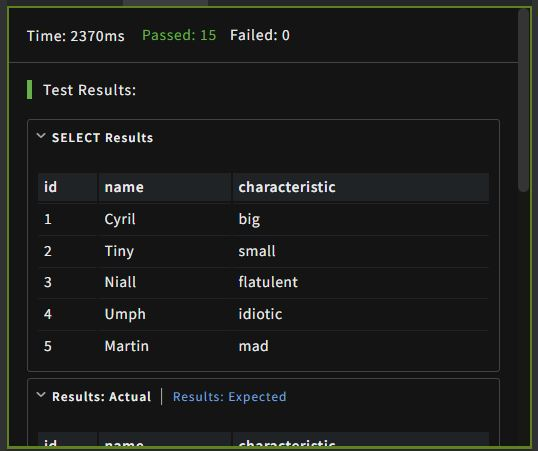

# Ranking 6

## 11/03/2022 [1] SQL Bug Fixing: Fix the QUERY - Totaling

Oh no! Timmys been moved into the database divison of his software company but as we know Timmy loves making mistakes. Help Timmy keep his job by fixing his query...

Timmy works for a statistical analysis company and has been given a task of totaling the number of sales on a given day grouped by each department name and then each day.

Resultant table:

day (type: date) {group by} [order by asc] <br>
department (type: text) {group by} [In a real world situation it is bad practice to name a column after a table]<br>
sale_count (type: int)<br>

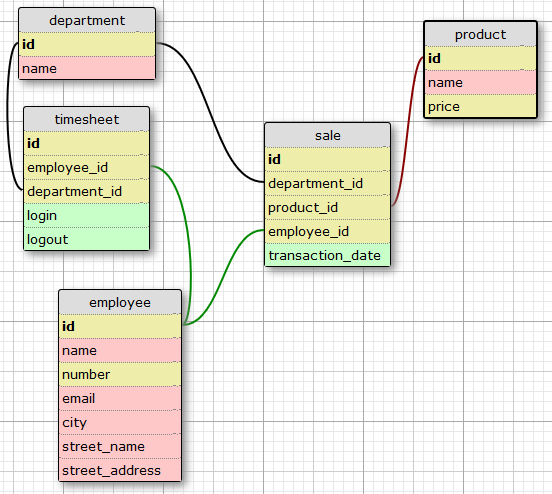

```sql
# Solução

SELECT 
  date(s.transaction_date) as day,
  d.name as department,
  COUNT(s.id) as sale_count
  FROM department d
    JOIN sale s on d.id = s.department_id
  group by department, day
  order by day;
```

resultado

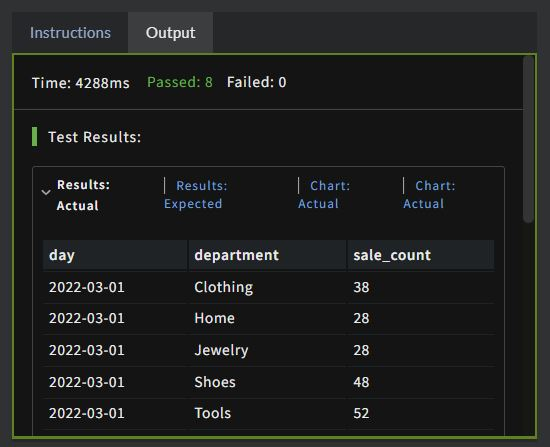

# Instalação e uso sqlite3

In [1]:
!pip install db-sqlite3

     |████████████████████████████████| 171 kB 3.9 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=08e10d6274097c317e60e452f0ff3bec34e9412b01349dedad36415143234d10
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3895 sha256=896b7021d1cf9ceac065c389350999511a25e5145e51c21341541a4f77122e2e
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31679 sha256=90ca8acc7c1955db5124939b50b5f6d4b27994c8045ca3545f754642c0bdc857
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm


In [2]:
import pandas as pd
import sqlite3

from datetime import date

In [3]:
#connecting with the database.

db = sqlite3.connect("testing.db")
db.execute("drop table if exists results")
try:
  db.execute("create table results(Name text, Date datetime, Mobile text,Mail text)")
except:
  print("Already table existed !!")

In [4]:
db = sqlite3.connect("testing.db")

In [5]:
Date = date.today().strftime("%d-%m-%Y")
Name = "TestDemo"
Mobile = "9000011101"
Mail = "teachineMachine1@you.com"

In [6]:
cmd = "insert into results(Name, Mobile,Date,Mail) values('{}','{}','{}','{}')".format(Name,Mobile,Date,Mail)
db.execute(cmd)
db.commit()

Querying

In [7]:
# modo 1

db = sqlite3.connect("testing.db")
rs = db.execute('SELECT * FROM results')
for row in rs:
    print (row)

('TestDemo', '11-03-2022', '9000011101', 'teachineMachine1@you.com')


In [8]:
# modo 2

db = sqlite3.connect("testing.db")
qry = """

SELECT * FROM results

"""
df = pd.read_sql_query(qry, db)
df.head()

,Name,Date,Mobile,Mail
0,TestDemo,11-03-2022,9000011101,teachineMachine1@you.com


Batch-wise data storage

In [9]:
def pushtoDB(Name,Mobile,Mail):
#inserting values inside the created table
    db = sqlite3.connect("testing.db")    
    from datetime import date
    Date = date.today().strftime("%d-%m-%Y")
    cmd = "insert into results(Name, Mobile,Date,Mail) values('{}','{}','{}','{}')".format(Name,Mobile,Date,Mail)
    db.execute(cmd)
    db.commit()

In [11]:
%%writefile dummy.csv
;

Writing dummy.csv


In [12]:
data = pd.read_csv("dummy.csv")
data.head()
data.shape

(0, 1)

In [13]:
pushtoDB("Testttt","121","2112")

In [14]:
db = sqlite3.connect("testing.db")
qry = "SELECT * FROM results"
df = pd.read_sql_query(qry, db)
df.head()

,Name,Date,Mobile,Mail
0,TestDemo,11-03-2022,9000011101,teachineMachine1@you.com
1,Testttt,11-03-2022,121,2112


In [15]:
for i in range(0,len(data)):
  pushtoDB(data.iloc[i][0],data.iloc[i][1],data.iloc[i][2])

In [16]:
db = sqlite3.connect("testing.db")
qry = """

SELECT * FROM results WHERE Name="TestDemo"

"""
df = pd.read_sql_query(qry, db)
df.head()

,Name,Date,Mobile,Mail
0,TestDemo,11-03-2022,9000011101,teachineMachine1@you.com
